In [ ]:
!pip install transformers torch hf_transfer seaborn matplotlib

In [1]:
import os
import sys
import subprocess
from huggingface_hub import login

import os

cache_dir = "/workspace/huggingface_cache"
os.environ['HF_HOME'] = cache_dir

# Create the directory if it doesn't exist
os.makedirs(cache_dir, exist_ok=True)

print(f"✅ Hugging Face cache directory is now set to: {os.environ['HF_HOME']}")

# Add the cloned repository to the Python path
sys.path.append('repository/circuit-tracer')
sys.path.append('repository/circuit-tracer/demos')

# This will prompt you for your token
login()


✅ Hugging Face cache directory is now set to: /workspace/huggingface_cache


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

In [3]:
model_name = 'google/gemma-2-2b'
model = AutoModelForCausalLM.from_pretrained(model_name, dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### Example 1 - Multi-hop Reasoning

In [9]:
input_text = "The capital of state containing Dallas is"
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=32)
print(tokenizer.decode(outputs[0]))

<bos>The capital of state containing Dallas is Austin.

The capital of state containing Dallas is Austin.

The capital of state containing Dallas is Austin.

The capital of state containing Dallas is Austin.


In [11]:
prompt = (
  "Let's think step by step and answer the following question. "
  "Question: The capital of the state containing Dallas is"
)
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
out = model.generate(input_ids, max_new_tokens=48, do_sample=False, temperature=0.0)
print(tokenizer.decode(out[0], skip_special_tokens=True))

Let's think step by step and answer the following question. Question: The capital of the state containing Dallas is Austin. The capital of the state containing Houston is Austin. The capital of the state containing San Antonio is Austin. The capital of the state containing San Diego is Austin. The capital of the state containing San Francisco is Austin. The capital of


In [20]:
prompt = (
  "What is the capital of the state containing Dallas? Let me solve this step by step."
)
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
out = model.generate(input_ids, max_new_tokens=125, do_sample=False, temperature=0.0)
print(tokenizer.decode(out[0], skip_special_tokens=True))

What is the capital of the state containing Dallas? Let me solve this step by step.

Step 1:

The state containing Dallas is Texas.

Step 2:

The capital of Texas is Austin.

Step 3:

The capital of Texas is Austin.

Step 4:

The capital of Texas is Austin.

Step 5:

The capital of Texas is Austin.

Step 6:

The capital of Texas is Austin.

Step 7:

The capital of Texas is Austin.

Step 8:

The capital of Texas is Austin.

Step 9:

The capital of Texas is Austin.

Step 10:

The


### Example 2 - GSM8K

In [22]:
input_text = "Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?" #Answer: $10
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=10)
print(tokenizer.decode(outputs[0]))

<bos>Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?

A. $60

B. $


In [8]:
input_text = "Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn? The correct answer is" #Answer: $10
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=10)
print(tokenizer.decode(outputs[0]))

<bos>Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn? The correct answer is $60.

The correct answer is $


In [21]:
input_text = "Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?" #Answer: $10
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=125)
print(tokenizer.decode(outputs[0]))

<bos>Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?

A. $60

B. $62

C. $64

D. $66

Show more
Step 1
1 of 2

$12\times 50=600 $

The amount of money earned is the product of the number of hours and the hourly rate.

Result
2 of 2

A<eos>


In [14]:
input_text = "Let's think step by step and answer the following question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?" #Answer: $10
input_ids = tokenizer(input_text, return_tensors="pt")#.to("cuda")

outputs = model.generate(**input_ids, max_new_tokens=125)
print(tokenizer.decode(outputs[0]))

<bos>Let's think step by step and answer the following question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?

Step 1
1 of 2

Let $x$ be the number of hours Weng worked.

The amount of money she earned is the product of the number of hours she worked and the hourly rate.

$\begin{align*} \text{amount of money earned} &= \text{number of hours worked} \times \text{hourly rate} \\ &= x \times \$12 \\ &= \$12x \end{align*} $

The amount of money she earned is $\$12x$.

Result
2 of 2

$\$12x $<eos>


In [6]:
prompt = (
  "James writes a 3-page letter to 2 different friends twice a week. How many pages does he write a year? The correct answer is" #Answer: 624
)
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
out = model.generate(input_ids, max_new_tokens=15, do_sample=False, temperature=0.0)
print(tokenizer.decode(out[0], skip_special_tokens=True))

James writes a 3-page letter to 2 different friends twice a week. How many pages does he write a year? The correct answer is 108.

The correct answer is 108.


In [7]:
prompt = (
  "James writes a 3-page letter to 2 different friends twice a week. How many pages does he write a year? Let me solve this step by step." #Answer: 624
)
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"]
out = model.generate(input_ids, max_new_tokens=150, do_sample=False, temperature=0.0)
print(tokenizer.decode(out[0], skip_special_tokens=True))

James writes a 3-page letter to 2 different friends twice a week. How many pages does he write a year? Let me solve this step by step.

Step 1: Find the number of weeks in a year.

There are 52 weeks in a year.

Step 2: Find the number of letters James writes in a year.

James writes 2 letters a week.

So, he writes 2 x 52 = 104 letters in a year.

Step 3: Find the number of pages James writes in a year.

James writes 3 pages in a letter.

So, he writes 3 x 104 = 312 pages in a year.

Therefore, James writes 312 pages in a year.


#### Gemma IT model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-2-2b-it",
    device_map="auto",
    torch_dtype=torch.bfloat16,
)

### Graph Analysis

In [13]:
import json
import numpy as np
from collections import defaultdict
from typing import Dict, List, Tuple, Optional
from transformers import AutoTokenizer

In [14]:
class GraphTokenAnalyzer:
    """Analyze attribution graphs and map nodes to tokens"""
    
    def __init__(self, graph_json: Dict, prompt: str, model_name: str = 'google/gemma-2-2b'):
        """
        Initialize analyzer with graph and prompt
        
        Args:
            graph_json: The graph JSON from circuit-tracer
            prompt: The original prompt used to generate the graph
            model_name: Model name for tokenizer
        """
        self.graph = graph_json
        self.nodes = graph_json.get('nodes', [])
        self.links = graph_json.get('links', [])
        self.prompt = prompt
        
        # Load tokenizer to map positions to tokens
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.tokens = self.tokenizer.encode(prompt)
        self.token_strings = self.tokenizer.convert_ids_to_tokens(self.tokens)
        
        # Build lookup dictionaries
        self.node_by_id = {node['node_id']: node for node in self.nodes}
        self._organize_nodes_by_layer()
    
    def _organize_nodes_by_layer(self):
        """Organize nodes by layer for efficient lookup"""
        self.nodes_by_layer = defaultdict(list)
        for node in self.nodes:
            layer = node.get('layer', '')
            if layer != '':
                self.nodes_by_layer[layer].append(node)
    
    def _safe_float(self, value, default=0.0):
        """Safely convert value to float, handling None"""
        if value is None:
            return default
        try:
            return float(value)
        except (ValueError, TypeError):
            return default
    
    def get_token_for_node(self, node: Dict) -> Optional[str]:
        """
        Get the token associated with a node
        
        Args:
            node: Node dictionary
            
        Returns:
            Token string if found, None otherwise
        """
        feature_type = node.get('feature_type', '')
        ctx_idx = node.get('ctx_idx', -1)
        
        # Handle None ctx_idx
        if ctx_idx is None:
            ctx_idx = -1
        
        # For token/embedding nodes
        if 'token' in feature_type.lower() or 'embedding' in feature_type.lower():
            if 0 <= ctx_idx < len(self.token_strings):
                return self.token_strings[ctx_idx]
        
        # For logit nodes (output predictions)
        if 'logit' in feature_type.lower() or node.get('is_target_logit', False):
            # The feature ID might represent the token ID
            feature_id = node.get('feature', -1)
            if feature_id is not None and feature_id >= 0:
                try:
                    return self.tokenizer.decode([feature_id])
                except:
                    return f"<token_id_{feature_id}>"
        
        # For transcoder feature nodes, return position info
        if 'transcoder' in feature_type.lower():
            if 0 <= ctx_idx < len(self.token_strings):
                return f"at_pos_{ctx_idx}[{self.token_strings[ctx_idx]}]"
        
        return None
    
    def get_node_description(self, node: Dict) -> str:
        """Get a human-readable description of a node"""
        node_id = node.get('node_id', 'unknown')
        feature_type = node.get('feature_type', 'unknown')
        feature = node.get('feature', '')
        layer = node.get('layer', '')
        ctx_idx = node.get('ctx_idx', '')
        
        # Safely get influence and activation
        influence = self._safe_float(node.get('influence'), default=0.0)
        activation = self._safe_float(node.get('activation'), default=0.0)
        
        token = self.get_token_for_node(node)
        token_str = f" '{token}'" if token else ""
        
        return (f"Node {node_id}: {feature_type} "
                f"(feature={feature}, layer={layer}, pos={ctx_idx}){token_str} "
                f"[influence={influence:.4f}, act={activation:.4f}]")
    
    def get_top_n_influential_by_layer(
        self, 
        n: int = 10,
        layer: Optional[str] = None
    ) -> Dict[str, List[Tuple[Dict, float, str]]]:
        """
        Get top N most influential nodes for each layer
        
        Args:
            n: Number of top nodes to return per layer
            layer: Specific layer to analyze (None = all layers)
            
        Returns:
            Dictionary mapping layer -> list of (node, influence, token, description) tuples
        """
        results = {}
        
        layers_to_analyze = [layer] if layer else sorted(self.nodes_by_layer.keys())
        
        for layer_id in layers_to_analyze:
            nodes = self.nodes_by_layer[layer_id]
            
            # Filter out nodes with None influence and sort by influence
            valid_nodes = [n for n in nodes if n.get('influence') is not None]
            sorted_nodes = sorted(
                valid_nodes, 
                key=lambda x: abs(self._safe_float(x.get('influence', 0))), 
                reverse=True
            )
            
            # Get top N
            top_nodes = []
            for node in sorted_nodes[:n]:
                influence = self._safe_float(node.get('influence', 0))
                description = self.get_node_description(node)
                token = self.get_token_for_node(node)
                top_nodes.append((node, influence, token, description))
            
            results[layer_id] = top_nodes
        
        return results
    
    def get_top_n_activated_by_layer(
        self, 
        n: int = 10,
        layer: Optional[str] = None
    ) -> Dict[str, List[Tuple[Dict, float, str]]]:
        """
        Get top N most activated nodes for each layer
        
        Similar to get_top_n_influential_by_layer but sorts by activation
        """
        results = {}
        
        layers_to_analyze = [layer] if layer else sorted(self.nodes_by_layer.keys())
        
        for layer_id in layers_to_analyze:
            nodes = self.nodes_by_layer[layer_id]
            
            # Filter out nodes with None activation and sort
            valid_nodes = [n for n in nodes if n.get('activation') is not None]
            sorted_nodes = sorted(
                valid_nodes, 
                key=lambda x: abs(self._safe_float(x.get('activation', 0))), 
                reverse=True
            )
            
            # Get top N
            top_nodes = []
            for node in sorted_nodes[:n]:
                activation = self._safe_float(node.get('activation', 0))
                description = self.get_node_description(node)
                token = self.get_token_for_node(node)
                top_nodes.append((node, activation, token, description))
            
            results[layer_id] = top_nodes
        
        return results
    
    def analyze_token_influence_across_layers(self, token_pos: int) -> List[Tuple[str, Dict]]:
        """
        Track how a specific token position influences computation across layers
        
        Args:
            token_pos: Position of token in sequence
            
        Returns:
            List of (layer, node_info) tuples
        """
        token_nodes = []
        
        for layer_id, nodes in self.nodes_by_layer.items():
            for node in nodes:
                ctx_idx = node.get('ctx_idx')
                if ctx_idx is not None and ctx_idx == token_pos:
                    token_nodes.append((layer_id, node))
        
        # Sort by layer
        token_nodes.sort(key=lambda x: int(x[0]) if x[0].isdigit() else 0)
        return token_nodes
    
    def get_output_predictions(self) -> List[Tuple[str, float]]:
        """
        Get predicted output tokens and their probabilities
        
        Returns:
            List of (token, probability) tuples
        """
        predictions = []
        
        for node in self.nodes:
            if node.get('is_target_logit', False):
                token = self.get_token_for_node(node)
                prob = self._safe_float(node.get('token_prob', 0))
                if token:
                    predictions.append((token, prob))
        
        return sorted(predictions, key=lambda x: x[1], reverse=True)
    
    def generate_influence_report(self, top_n: int = 5) -> str:
        """
        Generate a comprehensive report of influential nodes
        
        Args:
            top_n: Number of top nodes to show per layer
            
        Returns:
            Formatted report string
        """
        report = []
        report.append("="*80)
        report.append("GRAPH INFLUENCE ANALYSIS REPORT")
        report.append("="*80)
        report.append(f"\nPrompt: {self.prompt}")
        report.append(f"Total nodes: {len(self.nodes)}")
        report.append(f"Total layers analyzed: {len(self.nodes_by_layer)}")
        
        # Token information
        report.append(f"\n--- Input Tokens ---")
        for i, token in enumerate(self.token_strings):
            report.append(f"  Position {i}: '{token}'")
        
        # Output predictions
        predictions = self.get_output_predictions()
        if predictions:
            report.append(f"\n--- Top Predicted Output Tokens ---")
            for token, prob in predictions[:10]:
                report.append(f"  '{token}': {prob:.4f}")
        
        # Top influential nodes by layer
        report.append(f"\n--- Top {top_n} Most Influential Nodes Per Layer ---")
        influential = self.get_top_n_influential_by_layer(n=top_n)
        
        for layer_id in sorted(influential.keys(), key=lambda x: int(x) if x.isdigit() else 0):
            report.append(f"\n>>> Layer {layer_id} <<<")
            for i, (node, influence, token, description) in enumerate(influential[layer_id], 1):
                token_info = f" [Token: {token}]" if token else ""
                report.append(f"  {i}. Influence: {influence:.6f}{token_info}")
                report.append(f"     Feature: {node.get('feature')}, "
                            f"Type: {node.get('feature_type', 'N/A')}, "
                            f"Pos: {node.get('ctx_idx', 'N/A')}")
                activation = self._safe_float(node.get('activation'))
                report.append(f"     Activation: {activation:.4f}")
        
        report.append("\n" + "="*80)
        return "\n".join(report)
    
    def export_influence_matrix(self) -> np.ndarray:
        """
        Export influence values as a matrix [layer x position]
        
        Returns:
            NumPy array with shape (n_layers, n_positions)
        """
        # Get dimensions
        numeric_layers = [int(k) for k in self.nodes_by_layer.keys() if k.isdigit()]
        if not numeric_layers:
            return np.array([])
        
        max_layer = max(numeric_layers)
        max_pos = len(self.token_strings)
        
        # Initialize matrix
        influence_matrix = np.zeros((max_layer + 1, max_pos))
        
        # Fill matrix
        for layer_str, nodes in self.nodes_by_layer.items():
            if not layer_str.isdigit():
                continue
            layer_idx = int(layer_str)
            
            for node in nodes:
                ctx_idx = node.get('ctx_idx')
                if ctx_idx is None:
                    continue
                    
                influence = self._safe_float(node.get('influence', 0))
                
                if 0 <= ctx_idx < max_pos:
                    # Aggregate influences at each position
                    influence_matrix[layer_idx, ctx_idx] += abs(influence)
        
        return influence_matrix
    
    def plot_influence_heatmap(self, save_path: Optional[str] = None):
        """
        Plot influence heatmap across layers and token positions
        
        Args:
            save_path: Path to save figure (None = display)
        """
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        influence_matrix = self.export_influence_matrix()
        
        if influence_matrix.size == 0:
            print("No data to plot")
            return
        
        fig, ax = plt.subplots(figsize=(14, 8))
        
        sns.heatmap(
            influence_matrix,
            cmap='YlOrRd',
            xticklabels=self.token_strings,
            yticklabels=range(influence_matrix.shape[0]),
            cbar_kws={'label': 'Cumulative Influence'},
            ax=ax
        )
        
        ax.set_xlabel('Token Position', fontsize=12)
        ax.set_ylabel('Layer', fontsize=12)
        ax.set_title(f'Influence Heatmap\nPrompt: {self.prompt[:50]}...', fontsize=14)
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"✓ Saved heatmap to {save_path}")
        else:
            plt.show()


# ============================================================================
# MAIN USAGE FUNCTION
# ============================================================================

def analyze_graph_from_file(
    json_file: str,
    prompt: str,
    model_name: str = 'google/gemma-2-2b',
    top_n: int = 5,
    generate_plot: bool = True
):
    """
    Complete analysis of a graph JSON file
    
    Args:
        json_file: Path to the graph JSON file
        prompt: The prompt used to generate the graph
        model_name: Model name for tokenizer
        top_n: Number of top nodes to show per layer
        generate_plot: Whether to generate influence heatmap
    """
    # Load graph
    print(f"Loading graph from {json_file}...")
    with open(json_file, 'r') as f:
        graph_json = json.load(f)
    
    # Initialize analyzer
    print("Initializing analyzer...")
    analyzer = GraphTokenAnalyzer(graph_json, prompt, model_name)
    
    # Generate report
    print("\n" + "="*80)
    report = analyzer.generate_influence_report(top_n=top_n)
    print(report)
    
    # Get top influential nodes by layer
    print("\n--- Extracting Top Influential Nodes by Layer ---")
    influential = analyzer.get_top_n_influential_by_layer(n=top_n)
    
    # Save to CSV for further analysis
    import pandas as pd
    
    rows = []
    for layer, nodes in influential.items():
        for rank, (node, influence, token, desc) in enumerate(nodes, 1):
            rows.append({
                'layer': layer,
                'rank': rank,
                'node_id': node['node_id'],
                'feature': node.get('feature', ''),
                'feature_type': node.get('feature_type', ''),
                'position': node.get('ctx_idx', ''),
                'token': token,
                'influence': influence,
                'activation': analyzer._safe_float(node.get('activation', 0)),
            })
    
    df = pd.DataFrame(rows)
    output_csv = json_file.replace('.json', '_top_influential.csv')
    df.to_csv(output_csv, index=False)
    print(f"\n✓ Saved top influential nodes to: {output_csv}")
    
    # Generate heatmap
    if generate_plot:
        print("\n--- Generating Influence Heatmap ---")
        output_plot = json_file.replace('.json', '_heatmap.png')
        analyzer.plot_influence_heatmap(save_path=output_plot)
    
    return analyzer, influential

Loading graph from graphs/dallas-austin.json...
Initializing analyzer...

GRAPH INFLUENCE ANALYSIS REPORT

Prompt: The capital of state containing Dallas is
Total nodes: 1503
Total layers analyzed: 28

--- Input Tokens ---
  Position 0: '<bos>'
  Position 1: 'The'
  Position 2: '▁capital'
  Position 3: '▁of'
  Position 4: '▁state'
  Position 5: '▁containing'
  Position 6: '▁Dallas'
  Position 7: '▁is'

--- Top Predicted Output Tokens ---
  ' Austin': 0.3184

--- Top 10 Most Influential Nodes Per Layer ---

>>> Layer 0 <<<
  1. Influence: 0.799523 [Token: at_pos_2[▁capital]]
     Feature: 108434900, Type: cross layer transcoder, Pos: 2
     Activation: 1.0469
  2. Influence: 0.798999 [Token: at_pos_6[▁Dallas]]
     Feature: 46075199, Type: cross layer transcoder, Pos: 6
     Activation: 1.8203
  3. Influence: 0.798158 [Token: at_pos_4[▁state]]
     Feature: 23691285, Type: cross layer transcoder, Pos: 4
     Activation: 1.1406
  4. Influence: 0.798053 [Token: at_pos_6[▁Dallas]]
     Fea

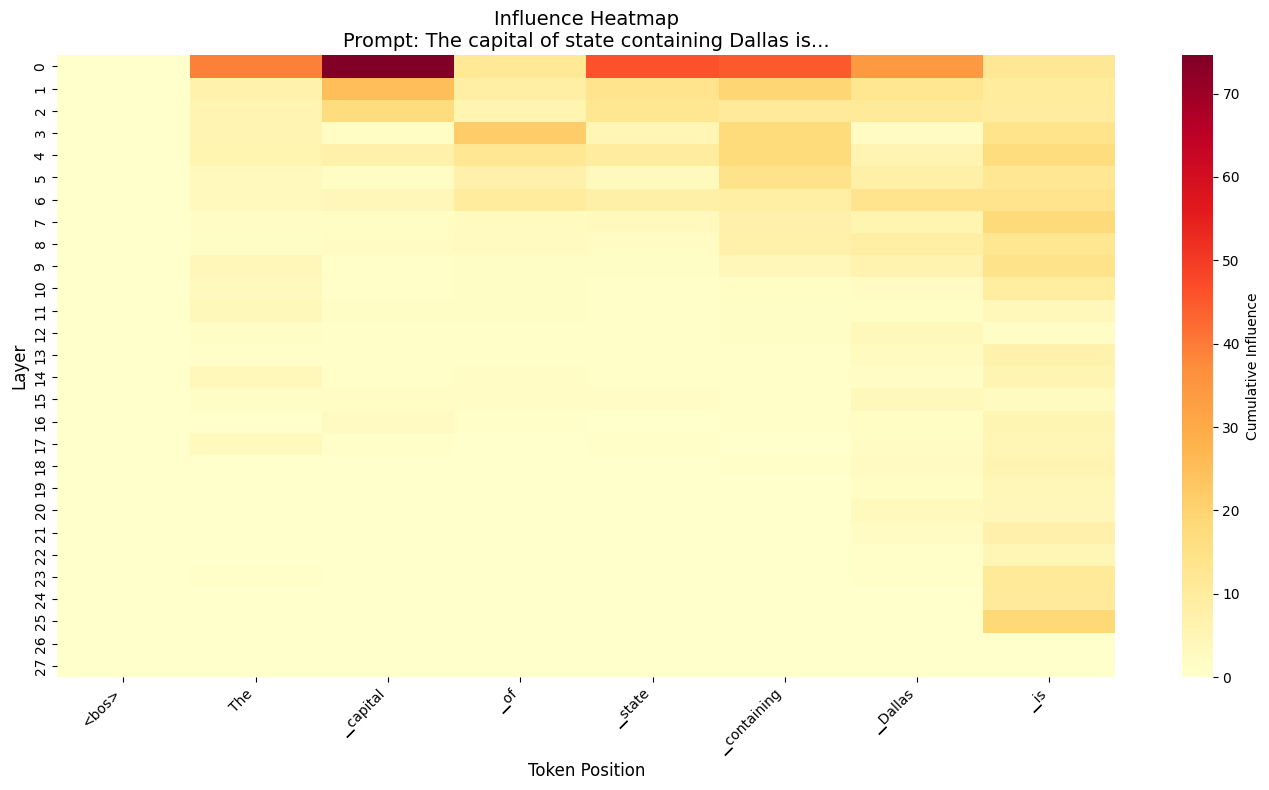

In [19]:
# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    
    json_file = "graphs/dallas-austin.json"  # Path to the JSON file
    prompt = "The capital of state containing Dallas is"
    
    # Run analysis
    analyzer, influential_nodes = analyze_graph_from_file(
        json_file=json_file,
        prompt=prompt,
        model_name='google/gemma-2-2b',
        top_n=10,  # Top 10 per layer
        generate_plot=True
    )
    
    # Additional analyses
    
    # 1. Analyze specific layer
    print("\n--- Detailed Analysis of Layer 0 ---")
    layer_0_influential = analyzer.get_top_n_influential_by_layer(n=10, layer="0")
    if "0" in layer_0_influential:
        for node, influence, token, desc in layer_0_influential["0"]:
            print(f"  Influence: {influence:.6f}")
            print(f"  Token: {token}")
            print(f"  Type: {node.get('feature_type')}")
            print()
    
    # 2. Track a specific token across layers
    print("\n--- Tracking Token at Position 5 Across Layers ---")
    token_pos = 5
    if token_pos < len(analyzer.token_strings):
        print(f"Token: '{analyzer.token_strings[token_pos]}'")
        token_across_layers = analyzer.analyze_token_influence_across_layers(token_pos)
        for layer, node in token_across_layers[:5]:  # Show first 5 layers
            influence = analyzer._safe_float(node.get('influence', 0))
            activation = analyzer._safe_float(node.get('activation', 0))
            print(f"  Layer {layer}: influence={influence:.4f}, activation={activation:.4f}")
    
    # 3. Get output predictions
    print("\n--- Model's Top Output Predictions ---")
    predictions = analyzer.get_output_predictions()
    for token, prob in predictions[:10]:
        print(f"  '{token}': {prob:.4f}")

    Early Layers (0-5):
    └─> Strong focus on INPUT tokens ("capital", "Dallas")
        └─> Model is ENCODING the question
    
    Middle Layers (6-20):
    └─> Distributed, quiet processing
        └─> Model is REASONING about the relationship
        └─> "What state has Dallas?" → Texas
        └─> "What's Texas's capital?" → Austin
    
    Late Layers (21-27):
    └─> Some activation near end of sequence
        └─> Model is GENERATING the output

### Comparison of COT Graph

In [12]:
import json
import torch
from typing import List, Dict, Tuple, Any
from transformers import AutoTokenizer
from circuit_tracer import attribute, ReplacementModel
from circuit_tracer.graph import Graph

In [13]:
class CoTFaithfulnessAnalyzer:
    """
    Analyze whether CoT reasoning text matches internal computational graphs
    """
    
    def __init__(self, model: ReplacementModel, tokenizer: AutoTokenizer):
        self.model = model
        self.tokenizer = tokenizer
    
    def graph_to_dict(self, graph: Graph) -> Dict:
        """
        Convert Graph object to dictionary using its export method
        
        Args:
            graph: Graph object from circuit-tracer
            
        Returns:
            Dictionary representation with 'nodes' and 'links'
        """
        try:
            # The Graph object should have an export or to_dict method
            if hasattr(graph, 'export'):
                return graph.export()
            elif hasattr(graph, 'to_dict'):
                return graph.to_dict()
            elif hasattr(graph, 'to_json'):
                json_str = graph.to_json()
                return json.loads(json_str)
            else:
                # Try to manually extract the data
                # The Graph class typically stores data in internal attributes
                result = {}
                
                # Try different ways to access the data
                if hasattr(graph, '_data'):
                    result = graph._data
                elif hasattr(graph, 'data'):
                    result = graph.data
                elif hasattr(graph, '__dict__'):
                    result = graph.__dict__
                
                # Ensure it has the right structure
                if 'nodes' not in result and 'links' not in result:
                    # Maybe it's nested
                    for key in result.keys():
                        if isinstance(result[key], dict) and 'nodes' in result[key]:
                            result = result[key]
                            break
                
                return result
        
        except Exception as e:
            print(f"Error converting graph: {e}")
            # Return empty structure
            return {'nodes': [], 'links': []}
    
    def save_graph_json(self, graph: Graph, filename: str) -> bool:
        """
        Save graph to JSON file using Graph's built-in method
        
        Returns:
            True if successful, False otherwise
        """
        try:
            # Try the Graph's own save method
            if hasattr(graph, 'save'):
                graph.save(filename)
                print(f"✓ Saved graph using graph.save() to {filename}")
                return True
            elif hasattr(graph, 'to_json'):
                with open(filename, 'w') as f:
                    f.write(graph.to_json())
                print(f"✓ Saved graph using to_json() to {filename}")
                return True
            elif hasattr(graph, 'export'):
                with open(filename, 'w') as f:
                    json.dump(graph.export(), f, indent=2)
                print(f"✓ Saved graph using export() to {filename}")
                return True
            else:
                print(f"✗ Graph object has no save/export method")
                print(f"   Available methods: {[m for m in dir(graph) if not m.startswith('_')]}")
                return False
        
        except Exception as e:
            print(f"✗ Could not save graph: {e}")
            return False
    
    def parse_cot_steps(self, full_text: str) -> List[Dict[str, str]]:
        """Parse CoT output into reasoning steps"""
        steps = []
        lines = full_text.split('\n')
        
        current_step = None
        for line in lines:
            line = line.strip()
            
            if line.startswith('Step '):
                if current_step:
                    steps.append(current_step)
                
                try:
                    step_num = int(line.split(':')[0].replace('Step', '').strip())
                    current_step = {
                        'step_number': step_num,
                        'step_text': line,
                        'claim': ''
                    }
                except:
                    pass
            
            elif current_step and line:
                if current_step['claim']:
                    current_step['claim'] += ' ' + line
                else:
                    current_step['claim'] = line
        
        if current_step:
            steps.append(current_step)
        
        return steps
    
    def generate_graphs_for_cot(
        self, 
        prompt: str, 
        cot_output: str,
        save_graphs: bool = True
    ) -> List[Dict]:
        """Generate attribution graphs for each point in the CoT sequence"""
        full_text = prompt + cot_output
        
        # Parse steps
        steps = self.parse_cot_steps(cot_output)
        
        if not steps:
            print("⚠ No steps found in CoT output")
            return []
        
        print(f"Found {len(steps)} steps to analyze")
        
        step_graphs = []
        
        for step in steps:
            step_text = step['step_text']
            if step['claim']:
                step_text += ' ' + step['claim']
            
            # Find where this step appears
            step_start_idx = full_text.find(step['claim']) if step['claim'] else -1
            
            if step_start_idx == -1:
                print(f"⚠ Could not find step {step['step_number']} in text")
                continue
            
            # Get text up to END of this step
            text_up_to_step = full_text[:step_start_idx + len(step['claim'])]
            
            print(f"\n{'='*60}")
            print(f"Step {step['step_number']}: {step['step_text']}")
            print(f"Claim: {step['claim']}")
            print(f"{'='*60}")
            
            try:
                # Generate attribution graph
                graph_obj = attribute(
                    prompt=text_up_to_step,
                    model=self.model,
                    max_n_logits=10,
                    desired_logit_prob=0.95,
                    verbose=False
                )
                
                print(f"✓ Graph generated")
                print(f"  Type: {type(graph_obj)}")
                print(f"  Methods: {[m for m in dir(graph_obj) if not m.startswith('_') and callable(getattr(graph_obj, m))][:10]}")
                
                step_info = {
                    'step_number': step['step_number'],
                    'step_text': step['step_text'],
                    'claim': step['claim'],
                    'text_up_to_step': text_up_to_step,
                    'graph_object': graph_obj,  # Store the object
                    'tokens': self.tokenizer.encode(text_up_to_step)
                }
                
                # Try to save using Graph's own method
                if save_graphs:
                    filename = f"step_{step['step_number']}_graph.json"
                    success = self.save_graph_json(graph_obj, filename)
                    
                    if success:
                        # Load it back to get the dict format
                        try:
                            with open(filename, 'r') as f:
                                graph_dict = json.load(f)
                                step_info['graph'] = graph_dict
                                print(f"✓ Loaded back: {len(graph_dict.get('nodes', []))} nodes")
                        except:
                            print(f"⚠ Could not load back the saved graph")
                            step_info['graph'] = {'nodes': [], 'links': []}
                    else:
                        step_info['graph'] = {'nodes': [], 'links': []}
                else:
                    # Try to convert
                    step_info['graph'] = self.graph_to_dict(graph_obj)
                
                step_graphs.append(step_info)
            
            except Exception as e:
                print(f"✗ Error for step {step['step_number']}: {e}")
                import traceback
                traceback.print_exc()
        
        return step_graphs
    
    def compare_cot_vs_direct(
        self,
        prompt: str,
        direct_answer: str,
        cot_answer: str
    ) -> Dict:
        """Compare computational graphs for direct vs CoT responses"""
        print("\n" + "="*80)
        print("GENERATING DIRECT ANSWER GRAPH")
        print("="*80)
        
        # Generate graph for direct answer
        direct_graph_obj = attribute(
            prompt=prompt + direct_answer,
            model=self.model,
            max_n_logits=10,
            verbose=False
        )
        
        print(f"✓ Direct graph generated")
        
        # Save and load back
        direct_filename = "direct_graph.json"
        success = self.save_graph_json(direct_graph_obj, direct_filename)
        
        if success:
            with open(direct_filename, 'r') as f:
                direct_graph = json.load(f)
        else:
            direct_graph = self.graph_to_dict(direct_graph_obj)
        
        direct_nodes = len(direct_graph.get('nodes', []))
        direct_edges = len(direct_graph.get('links', []))
        
        print(f"  Nodes: {direct_nodes}, Edges: {direct_edges}")
        
        print("\n" + "="*80)
        print("GENERATING COT GRAPHS")
        print("="*80)
        
        # Generate graphs for CoT
        cot_graphs = self.generate_graphs_for_cot(prompt, cot_answer)
        
        # Compare
        if len(cot_graphs) > 0:
            cot_nodes_list = [len(g['graph'].get('nodes', [])) for g in cot_graphs]
            cot_edges_list = [len(g['graph'].get('links', [])) for g in cot_graphs]
            
            cot_nodes_avg = sum(cot_nodes_list) / len(cot_nodes_list) if cot_nodes_list else 0
            cot_edges_avg = sum(cot_edges_list) / len(cot_edges_list) if cot_edges_list else 0
            
            print(f"\n✓ Generated {len(cot_graphs)} CoT step graphs")
            for i, (nodes, edges) in enumerate(zip(cot_nodes_list, cot_edges_list), 1):
                print(f"  Step {i}: {nodes} nodes, {edges} edges")
        else:
            cot_nodes_avg = 0
            cot_edges_avg = 0
            print("\n⚠ No CoT graphs generated")
        
        comparison = {
            'direct': {
                'num_nodes': direct_nodes,
                'num_edges': direct_edges,
                'graph': direct_graph
            },
            'cot': {
                'num_steps': len(cot_graphs),
                'avg_nodes_per_step': cot_nodes_avg,
                'avg_edges_per_step': cot_edges_avg,
                'step_graphs': cot_graphs
            },
            'metrics': {
                'nodes_ratio': cot_nodes_avg / direct_nodes if direct_nodes > 0 else 0,
                'edges_ratio': cot_edges_avg / direct_edges if direct_edges > 0 else 0
            }
        }
        
        return comparison


class CoTGraphComparator:
    """Compare multiple CoT graphs to find patterns"""
    
    def __init__(self):
        self.step_graphs = []
    
    def add_step_graph(self, step_info: Dict):
        """Add a CoT step's graph"""
        self.step_graphs.append(step_info)
    
    def find_key_entities_in_steps(self) -> Dict[str, List[int]]:
        """
        Find which steps mention key entities (e.g., "Texas", "Austin")
        
        Returns:
            Dict mapping entity -> list of step numbers where it appears
        """
        entity_appearances = {
            'Texas': [],
            'Dallas': [],
            'Austin': [],
            'capital': [],
            'state': []
        }
        
        for step_info in self.step_graphs:
            step_num = step_info['step_number']
            claim = step_info['claim'].lower()
            
            for entity in entity_appearances.keys():
                if entity.lower() in claim:
                    entity_appearances[entity].append(step_num)
        
        return entity_appearances
    
    def track_entity_influence_across_steps(
        self,
        entity: str,
        tokenizer: AutoTokenizer
    ) -> List[Dict]:
        """
        Track how a specific entity's influence changes across CoT steps
        
        Args:
            entity: Entity name (e.g., "Texas")
            
        Returns:
            List of influence metrics per step
        """
        entity_token_ids = tokenizer.encode(entity, add_special_tokens=False)
        
        influence_trajectory = []
        
        for step_info in self.step_graphs:
            graph = step_info['graph']
            nodes = graph.get('nodes', [])
            
            # Find nodes related to this entity
            entity_influence = 0
            entity_nodes = 0
            
            for node in nodes:
                # Check if this node relates to the entity
                influence = node.get('influence', 0)
                if influence and influence > 0:
                    entity_influence += abs(influence)
                    entity_nodes += 1
            
            influence_trajectory.append({
                'step_number': step_info['step_number'],
                'claim': step_info['claim'],
                'entity_total_influence': entity_influence,
                'entity_node_count': entity_nodes
            })
        
        return influence_trajectory


# ============================================================================
# MAIN ANALYSIS FUNCTION
# ============================================================================

def analyze_cot_faithfulness(
    model: ReplacementModel,
    tokenizer: AutoTokenizer,
    prompt: str,
    generate_response: bool = True
):
    """Complete CoT faithfulness analysis"""
    
    analyzer = CoTFaithfulnessAnalyzer(model, tokenizer)
    
    # Use your example output
    cot_output = """
Step 1:

The state containing Dallas is Texas.

Step 2:

The capital of Texas is Austin.
"""
    
    print("\n" + "="*80)
    print("COT OUTPUT:")
    print("="*80)
    print(cot_output)
    
    # Compare with direct answer
    print("\n" + "="*80)
    print("COMPARING COT VS DIRECT ANSWER")
    print("="*80)
    
    direct_answer = " Austin"
    comparison = analyzer.compare_cot_vs_direct(
        prompt="What is the capital of the state containing Dallas?",
        direct_answer=direct_answer,
        cot_answer=cot_output
    )
    
    print(f"\n{'='*80}")
    print("COMPARISON RESULTS")
    print(f"{'='*80}")
    print(f"\nDirect answer:")
    print(f"  Nodes: {comparison['direct']['num_nodes']}")
    print(f"  Edges: {comparison['direct']['num_edges']}")
    
    print(f"\nCoT (average per step):")
    print(f"  Steps: {comparison['cot']['num_steps']}")
    print(f"  Avg nodes: {comparison['cot']['avg_nodes_per_step']:.1f}")
    print(f"  Avg edges: {comparison['cot']['avg_edges_per_step']:.1f}")
    
    if comparison['metrics']['nodes_ratio'] > 0:
        print(f"\nRatios:")
        print(f"  Node ratio (CoT/Direct): {comparison['metrics']['nodes_ratio']:.2f}")
        print(f"  Edge ratio (CoT/Direct): {comparison['metrics']['edges_ratio']:.2f}")
    
    return comparison


In [14]:
# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Load model
    model_name = 'google/gemma-2-2b'
    transcoder_name = "gemma"
    
    model = ReplacementModel.from_pretrained(
        model_name, 
        transcoder_name, 
        dtype=torch.bfloat16
    )
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # Run analysis
    prompt = "What is the capital of the state containing Dallas? Let me solve this step by step."
    
    results = analyze_cot_faithfulness(
        model=model,
        tokenizer=tokenizer,
        prompt=prompt,
        generate_response=False  # Use your example output
    )
    
    # Save results
    print("\n✓ Analysis complete!")
    print("Generated graphs saved as step_N_graph.json")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loaded pretrained model google/gemma-2-2b into HookedTransformer

COT OUTPUT:

Step 1:

The state containing Dallas is Texas.

Step 2:

The capital of Texas is Austin.


COMPARING COT VS DIRECT ANSWER

GENERATING DIRECT ANSWER GRAPH
✓ Direct graph generated
✗ Graph object has no save/export method
   Available methods: ['activation_values', 'active_features', 'adjacency_matrix', 'cfg', 'from_pt', 'input_string', 'input_tokens', 'logit_probabilities', 'logit_tokens', 'n_pos', 'scan', 'selected_features', 'to', 'to_pt']
  Nodes: 0, Edges: 0

GENERATING COT GRAPHS
Found 2 steps to analyze

Step 1: Step 1:
Claim: The state containing Dallas is Texas.
✓ Graph generated
  Type: <class 'circuit_tracer.graph.Graph'>
  Methods: ['from_pt', 'to', 'to_pt']
✗ Graph object has no save/export method
   Available methods: ['activation_values', 'active_features', 'adjacency_matrix', 'cfg', 'from_pt', 'input_string', 'input_tokens', 'logit_probabilities', 'logit_tokens', 'n_pos', 'scan', 'selected_feat